# HW8

This HW contains more open-ended questions than your previous HWs. We believe that a data scientist should be able to do more than just write code. Importantly, they should be able to look at results and provide a reasonable interpretation. 

Of course, what is rational (obvious?) to one person might seem completely illogical to another. So, wherever possible, please use figures to back up your hypotheses.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [4]:
%matplotlib inline

In order to ensure your plots are inline, make sure to run the matplotlib magic command. 

In [3]:
def standardize(anylist):
    '''convert any array of numbers to std units '''
    return (anylist - np.mean(anylist)) / np.std(anylist)

def correlation(df, x, y):
    '''correlation between two columns of a dataframe '''
    return np.mean(standardize(df[x]) * standardize(df[y]))

def slope(df, x, y):
    r = correlation(df, x, y)
    return r * np.std(df[y]) / np.std(df[x])

def intercept(df, x, y):
    a = slope(df, x, y)
    return np.mean(df[y]) - a * np.mean(df[x])

## Q1

"Correlation is not causation" is an oft quoted line in any data science course. That has led to the following xkcd.com comic.

In a few words, please explain the joke here (this also happens to one of the most famous xkcd strips) in language that someone who has not taken CIS105 (or any math-y/stats-y course) can understand.

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://imgs.xkcd.com/comics/correlation.png")

- Haha. The joke is that the guy is saying that he learned "correlation doesn't imply causation." The girl says "sounds like the class helped" which is basically saying that his new knowledge caused the class to be helpful. The "well, maybe" is a nod to "correlation doesn't imply causation" because he's basically saying that her deduction might not be a causation.

## Q2

http://www.tylervigen.com/spurious-correlations lists a number of correlations that the author claims are spurious (seeming to be true but actually invalid) correlations. 

One of the correlations that has intrigued me (Arvind) is the one between arcade revenue and computer science doctorates. This is mostly because I spent 2002 - 2008 doing my PhD. 

What if I claim that particular correlation is legitimate? After all, we can all agree that arcades are frequented by geeks. Do you agree with this? Is there a hidden variable here, and, if so, what could it be?

- I do not agree that the correlation is legitimate. The proportion of computer science students / total arcade visitors is very small, so the relationship should not be very strong. A hidden variable could be the popularity of technology. As tech and games and computer stuff becomes more popular, more people may visit the arcade leading to an increase in revenue, and more people may decide to go into computer science and get doctorates.

# Evaluating the baby weight prediction model 

## Q3

We know that a typical linear regression line is the one that minimizes mean squared error.

However, this is not the best method of checking the predictive power of a model.

A good model should not only fit the data that it has been exposed to, but should also be able to predict the truly unseen data.

As it turns out, there is another dataset for babies from specifically Philadelphia (`phillybabies.csv`). *Note that the baby weights in this dataset are expressed in grams, and the gestation period is in weeks in this dataset.*

Use the model (based on `baby.csv`) that we created in lecture that predicts baby weight based on gestational days to predict Philly baby weights using the values in `phillybabies.csv`.

In [5]:
phillybabies = pd.read_csv('phillybabies.csv')

In [6]:
phillybabies.head()

,count,black,educ,smoke,gestate,weight
0,1,NO,0,YES,40,2898
1,2,YES,0,YES,26,994
2,3,NO,2,NO,38,3977
3,4,NO,2,YES,37,3040
4,5,NO,2,NO,38,3523


In [136]:
import scipy.optimize as opt

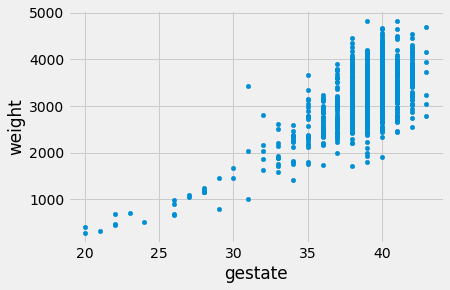

In [128]:
phillybabies.plot.scatter("gestate", "weight")


In [172]:
m, b = np.polyfit(phillybabies["gestate"], phillybabies["weight"], 1)
print("slope:", m)
print("intercept:", b)

slope: 166.44628542785355
intercept: -3245.4463939995358


In [144]:
predicted_weight = phillybabies["gestate"] * m + b
res = phillybabies["weight"] - predicted_weight
rmse = np.sqrt(np.mean(np.power(res, 2)))
print('the root mean squared error: ' + str(rmse))

the root mean squared error: 3275.1213285206513


In [145]:
def baby_rmse(s):
    x = phillybabies["gestate"]
    y = phillybabies["weight"]
    y_pred = s[0] * x + s[1]
    return np.sqrt(np.mean(y_pred - y)**2)

In [177]:
# using the approximations of the slope and intercept from np.polyfit
opt.minimize(baby_rmse, np.array([166, -3245]))

      fun: 6.472555836432952e-08
 hess_inv: array([[6.29760731e-03, 1.62137069e-04],
       [1.62137069e-04, 1.00066702e+00]])
      jac: array([30.15393822, -1.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 408
      nit: 1
     njev: 99
   status: 2
  success: False
        x: array([  166.43450464, -3244.98881332])

- model that predicts philly baby weights based on gestational days (via opt.minimize model):
      baby weight = -3244.99 + 166.4345 * number of gestational days

What is the sum of the squared errors in the prediction?

In [147]:
sum_squared_errors = np.sum(np.power(res, 2))
print('the sum of the squared errors in the prediction: ' + str(sum_squared_errors))

the sum of the squared errors in the prediction: 11959957983.931942


Generate a scatter plot of the residuals that you get when you predict the Philly baby weights. Is this the sign of a good regression model?

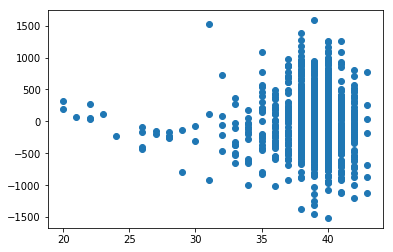

In [11]:
plt.scatter(phillybabies["gestate"], res)

- When we plot the residuals, we want to see not only small residuals centered around 0, but also random-looking residuals. This scatter plot of the residuals does not have a high concentration of points centered around 0, which may be explained by heteroscedasticity. So no, this is not an amazing regression model.

## Q4 

We noticed, in lecture, that there are a few babies that were outliers (many SDs away from the mean) in terms of their gestational days. This question tries to find the effect that these outliers have on the regression line.

Remove the outliers, create the regression line again, and use it to predict the Philly baby weights. Does the removal of outliers in the training data result in a more predictive model (does it do better in predicting the Philly baby weights)?


In [158]:
#removing outliers:
phillybabies['standardized_gestate'] = standardize(phillybabies['gestate'])
phillybabies.head()

,count,black,educ,smoke,gestate,weight,standardized_gestate
0,1,NO,0,YES,40,2898,0.433818
1,2,YES,0,YES,26,994,-4.807591
2,3,NO,2,NO,38,3977,-0.314955
3,4,NO,2,YES,37,3040,-0.689341
4,5,NO,2,NO,38,3523,-0.314955


In [159]:
# We're taking out all the rows with gestational week values that are outside of 2 standard deviations from the mean.
# That is how I will define outliers for this problem; data outside 2 STDs from the mean (Arvind said this was ok on 
# piazza)
upper_bound = np.mean(phillybabies['standardized_gestate']) + 2 * np.std(phillybabies['standardized_gestate'])
lower_bound = np.mean(phillybabies['standardized_gestate']) - 2 * np.std(phillybabies['standardized_gestate'])
within_2_SD = phillybabies[np.logical_and(phillybabies['standardized_gestate'] < upper_bound, phillybabies['standardized_gestate'] > lower_bound)]
phillybabies_no_outliers = within_2_SD

In [160]:
predicted_weight_no_outliers = phillybabies_no_outliers["gestate"] * m + b
res = phillybabies_no_outliers["weight"] - predicted_weight_no_outliers

In [161]:
m, b = np.polyfit(phillybabies_no_outliers["gestate"], phillybabies_no_outliers["weight"], 1)
print("slope:", m)
print("intercept:", b)

slope: 153.63563813621548
intercept: -2738.687721479927


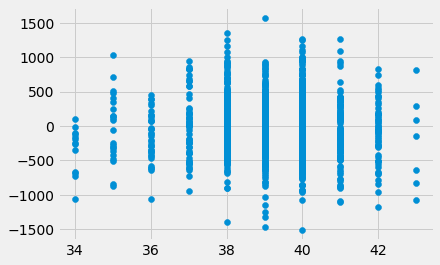

In [162]:
plt.scatter(phillybabies_no_outliers["gestate"], res)

- Yes, removing the outliers makes the model more accurate. In lecture, Arvind said good linear models should residuals that look like a blob on the scatterplot. This is more blobbish than the first scatter plot with the outliers.

## Q5

In lecture we saw how the bootstrapping technique can be used to get an empirical confidence interval for the slope of a regression line.

Apply this technique to the slope of the regression line we computed for the original baby data (`baby.csv`).

As a reminder, bootstrapping has the following steps:

1. Compute a statistic from the original sample - in this case, the slope of the regression line.
2. Repeatedly create samples from your original sample by sampling with replacement
3. For each of the samples, compute the same statistic and store the values obtained.
4. Finally, plot a histogram of the various values of the statistic.

In [5]:
babies = pd.read_csv('baby.csv')

In [11]:
def standardize(anylist):
    '''convert any array of numbers to std units '''
    return (anylist - np.mean(anylist)) / np.std(anylist)

def correlation(df, x, y):
    '''correlation between two columns of a dataframe '''
    return np.mean(standardize(df[x]) * standardize(df[y]))

def slope(df, x, y):
    r = correlation(df, x, y)
    return r * np.std(df[y]) / np.std(df[x])

In [15]:
original_slope = slope(babies,'Gestational Days', 'Birth Weight')
original_slope

0.4665568769492164

In [14]:
random_sample = babies.sample(500, replace=True)  
slope(random_sample, 'Gestational Days', 'Birth Weight')

0.5223274066581995

In [16]:
slopes = []
for i in np.arange(2500): #for 2500 times, we want to generate random sample w/ replacement
    random_sample = babies.sample(500, replace=True)  
    new_slope = slope(random_sample, 'Gestational Days', 'Birth Weight')
    slopes.append(new_slope)

Text(0.5,1,'Bootstrapped Slope Distribution')

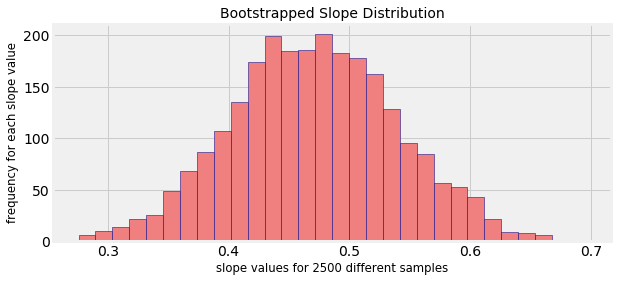

In [17]:
plt.figure(figsize=(10,4))
plt.style.use('fivethirtyeight')
plt.hist(slopes, bins = 30, color = 'lightcoral', ec = 'darkblue')
plt.xlabel('slope values for 2500 different samples', size = 'small')
plt.ylabel('frequency for each slope value', size = 'small')
plt.title('Bootstrapped Slope Distribution', size = 'medium')

In [169]:
# Calculating a 95% confidence interval for the slope values
lower_bound = np.percentile(slopes, 2.5)
upper_bound = np.percentile(slopes, 97.5)

In [170]:
print("We are 95% certain that the slope values will be between " + str(lower_bound) + " and " + str(upper_bound))

We are 95% certain that the slope values will be between 0.3366879560493333 and 0.610212628551802


## Money making movies!

## Q6

Look at the blockbusters.csv file and the budgets.csv file for this question

Your goal is to try and make some predictions about how much money a movie will make (the adjusted gross column).

Notice that this data set has both the rotten tomatoes scores and the imdb scores.

Please do some data cleaning here. Get rid of NaNs, get rid of movies with ratings of 0, etc.

In [180]:
movies = pd.read_csv('blockbusters.csv')

In [181]:
movies.columns

Index(['audience_freshness', 'poster_url', 'rt_audience_score', 'rt_freshness',
       'rt_score', '2015_inflation', 'adjusted', 'genres', 'Genre_1',
       'Genre_2', 'Genre_3', 'imdb_rating', 'length', 'rank_in_year', 'rating',
       'release_date', 'studio', 'title', 'worldwide_gross', 'year'],
      dtype='object')

In [182]:
# dropping any possible nans in the listed subset; not dropping nans in 'Genre_1', 'Genre_2', and 'Genre_3'
# because that would remove movies that don't have more than 1 genre.
movies = movies.dropna(subset = ['imdb_rating', 'length', 'rank_in_year', 'genres', 'rating', 'year', 
                                 'audience_freshness', 'rt_audience_score', 'rt_freshness','rt_score',
                                 'worldwide_gross'])

In [183]:
movies.shape

(398, 20)

In [184]:
# Removing all the movies with rt_scores and rt_freshness ratings of 0. 
movies = movies[np.logical_and(movies['rt_score'] != 0, movies['rt_freshness'] != 0)]
movies.shape

(392, 20)

## Part 1

Are the rt_freshness scores and the imdb scores related in any manner? Plot a scatter plot to answer this. Name some movies (as per this dataset) that are outliers in the sense that their rotten tomatoes score and their imdb score are vastly different.

#### Are the rt_freshness scores and the imdb scores related in any manner? Plot a scatter plot to answer this.

In [29]:
r = correlation(movies, 'rt_freshness', 'imdb_rating')
r

0.7379022733512594

- there is a distinct positive correlation between rt freshness and imdb scores.

In [30]:
m, b = np.polyfit(movies['rt_freshness'], movies['imdb_rating'], 1)

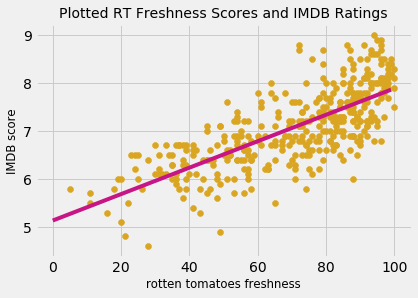

In [31]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (6, 4))
plt.scatter(movies['rt_freshness'], movies['imdb_rating'], color = 'goldenrod')
plt.xlabel('rotten tomatoes freshness', size = 'small')
plt.ylabel('IMDB score', size = 'small')
plt.title('Plotted RT Freshness Scores and IMDB Ratings', size = 'medium')

xvals = np.arange(0, 100)
yvals = m * xvals + b 
plt.plot(xvals, yvals, color = 'mediumvioletred') #graphing the linear regression


- The correlation of 0.7379 and the scatter plot show there is some significnt relation between rt freshness and imdb scores.

#### Name some movies (as per this dataset) that are outliers in the sense that their rotten tomatoes score and their imdb score are vastly different.

In [185]:
# standardizing the ratings.
movies['z_rt_freshness'] = standardize(movies['rt_freshness'])
movies['z_imdb_rating'] = standardize(movies['imdb_rating'])

In [186]:
# calculating the difference between rt freshness and imdb rating for all rows
movies['rt_imdb_difference'] = movies['z_rt_freshness'] - movies['z_imdb_rating']
movies['rt_imdb_difference'] = np.abs(movies['rt_imdb_difference'])
movies.sort_values('rt_imdb_difference', ascending = False)[['rt_imdb_difference', 'title']].head(5)

,rt_imdb_difference,title
344,2.138767,Private Benjamin
202,2.056177,Forrest Gump
3,1.932724,Interstellar
279,1.739681,Three Men and a Baby
48,1.697196,The Twilight Saga: Eclipse


In [187]:
top_outliers = movies.sort_values('rt_imdb_difference', ascending = False)[['rt_imdb_difference', 'title']].head(5)[['title']]
print('These are the 5 movies with the greatest difference between RT score and IMDB score:')
top_outliers

These are the 5 movies with the greatest difference between RT score and IMDB score:


,title
344,Private Benjamin
202,Forrest Gump
3,Interstellar
279,Three Men and a Baby
48,The Twilight Saga: Eclipse


### Part 2 

If you had to use only one out of the rotten tomatoes or imdb scores to predict the success of a movie, which one would you pick? To answer this build a linear regression model that predicts the adjusted gross based only on rt_freshness. Then build a linear regression model that predicts the adjusted gross based on imdb scores. Which one is doing better? We will evaluate the models by comparing the root mean square error in the predictions.

In [35]:
# Must write a function to convert the values from strings to floats
def floatify(my_number):
    my_num = my_number.split('$')
    my_num = my_num[1].split(',')
    my_num = float(''.join(my_num))
    return my_num

vect_floatify = np.vectorize(floatify)

In [36]:
movies['float_gross'] = vect_floatify(movies['adjusted'])

In [37]:
# making the model for gross based on RT freshness

In [38]:
m1, b1 = np.polyfit(movies["rt_freshness"], movies["float_gross"], 1)
print("slope:", m1)
print("intercept:", b1)

slope: 1063836.260672998
intercept: 471601530.01662207


In [39]:
correlation(movies, 'float_gross', 'rt_freshness')

0.06770861431189738

- very small linear correlation between rt freshness and gross earnings.

##### linear regression model that predicts the adjusted gross based only on rt_freshness

- predicted_gross_rt = rt_freshness * 1063836.261 + 471601530.017

In [40]:
# making the model for gross based on IMDB ratings

In [41]:
m2, b2 = np.polyfit(movies["imdb_rating"], movies["float_gross"], 1)
print("slope:", m2)
print("intercept:", b2)

slope: 110195939.90135102
intercept: -233234549.55004466


In [42]:
correlation(movies, 'float_gross', 'imdb_rating')

0.26214030911798475

- small linear correlation between rt freshness and gross earnings.

##### linear regression model that predicts the adjusted gross based on imdb scores

- predicted_gross_imdb = imdb_rating * 110195939.901  - 233234549.550

####  evaluate the models by comparing the root mean square error in the predictions.

In [46]:
predicted_gross_rt = (movies["rt_freshness"] * m1) + b1
res_rt = movies["float_gross"] - predicted_gross_rt #actual gross - predicted gross based on rt_freshness
mse_rt = np.mean(np.power(res_rt, 2))
rmse_rt = np.sqrt(mse_rt)
print('This is the RMSE for the rotten-tomatoes-based prediction: ' + str(rmse_rt))

This is the RMSE for the rotten-tomatoes-based prediction: 339730351.2002244


In [47]:
predicted_gross_imdb = (movies["imdb_rating"] * m2) + b2
res_imdb = movies["float_gross"] - predicted_gross_imdb #actual gross - predicted gross based on imdb_freshness
mse_imdb = np.mean(np.power(res_imdb, 2))
rmse_imdb = np.sqrt(mse_imdb)
print('This is the RMSE for the IMDB-based prediction: ' + str(rmse_imdb))

This is the RMSE for the IMDB-based prediction: 328604003.56867945


In [45]:
rmse_imdb < rmse_rt

True

- We can see that the RMSE for the IMDB-based prediction of movie gross is less than the RMSE for the Rotten Tomatoes-based prediction of movie gross. Thus the IMDB-based prediction does a better job at predicting the gross of a movie.

### Part 3 

The budgets data set that has movie budgets in it. The somewhat sad piece of news is that the two datasets are not representative of the same set of films. Picking only the common films, we want you to see if the movie budget is correlated to the movie adjusted gross earnings. Use bootstrapping to provide us with a 95% confidence interval for the correlation coefficient. Based on this confidence interval, would you using the movie budget as a predictor for the amount of money that a movie will make?

In [68]:
budgets = pd.read_csv('budgets.csv')

In [74]:
movies = movies.rename(columns = {'title' : 'Movie Title'})
budgets = budgets.rename(columns = {'Movie' : 'Movie Title'})

In [76]:
movie_budgets = pd.merge(movies, budgets, on = 'Movie Title', how = 'inner')

In [82]:
movie_budgets.head()

,audience_freshness,poster_url,rt_audience_score,rt_freshness,rt_score,2015_inflation,adjusted,genres,Genre_1,Genre_2,...,worldwide_gross,year,z_rt_freshness,z_imdb_rating,rt_imdb_difference,float_gross,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,92.0,http://resizing.flixster.com/gxRJwetP1eNIrPR6x...,4.3,89.0,7.5,-0.26%,"$712,903,691.09",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,...,"$714,766,572.00",2014.0,0.856221,0.893455,0.037234,7.129037e+08,4/4/14,"$170,000,000","$259,746,958","$714,401,889"
1,89.0,http://resizing.flixster.com/gDtbA1iPxTYEjBZeS...,4.2,90.0,7.9,-0.26%,"$706,988,165.89",Sci-Fi\nDrama\nAction,Sci-Fi,Drama,...,"$708,835,589.00",2014.0,0.902363,0.770003,0.132360,7.069882e+08,7/11/14,"$170,000,000","$208,545,589","$710,644,566"
2,93.0,http://resizing.flixster.com/YrF_OeTQx3bXNsMLI...,4.4,91.0,7.7,-0.26%,"$772,158,880.00",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,...,"$774,176,600.00",2014.0,0.948506,1.263813,0.315307,7.721589e+08,8/1/14,"$170,000,000","$333,172,112","$771,051,335"
3,86.0,http://resizing.flixster.com/l9yjA-72sZMYECeOj...,4.2,72.0,7.0,-0.26%,"$671,220,455.10",Sci-Fi\nAdventure,Sci-Fi,Adventure,...,"$672,974,414.00",2014.0,0.071803,2.004527,1.932724,6.712205e+08,11/5/14,"$165,000,000","$188,017,894","$667,752,422"
4,71.0,http://resizing.flixster.com/YukULOFULUesVZccN...,3.8,49.0,5.7,-0.26%,"$756,677,675.77",Family\nAdventure\nAction,Family,Adventure,...,"$758,654,942.00",2014.0,-0.989469,0.029288,1.018757,7.566777e+08,5/30/14,"$180,000,000","$241,407,328","$758,536,735"


In [85]:
movie_budgets['float_production_budget'] = vect_floatify(movie_budgets['Production Budget'])

In [95]:
original_correlation = correlation(movie_budgets,'float_production_budget', 'float_gross')
original_correlation

0.491425439312412

In [96]:
random_sample = movie_budgets.sample(500, replace=True)  
correlation(random_sample,'float_production_budget', 'float_gross')

0.4870364881106046

In [100]:
correlations = []
for i in np.arange(2500): #for 2500 times, we want to generate random sample w/ replacement
    random_sample = movie_budgets.sample(500, replace=True)   
    new_correlations = correlation(random_sample,'float_production_budget', 'float_gross')
    correlations.append(new_correlations)

Text(0.5,1,'Bootstrapped Correlation Distribution (gross sales by budget)')

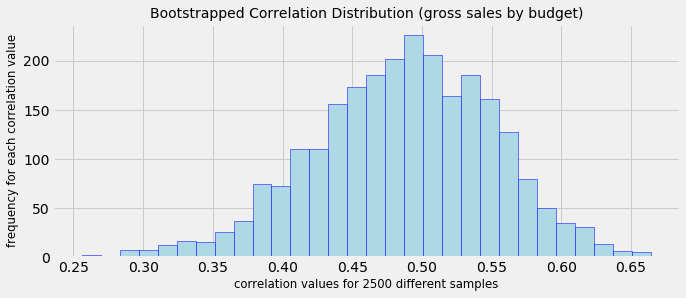

In [171]:
plt.figure(figsize=(10,4))
plt.style.use('fivethirtyeight')
plt.hist(correlations, bins = 30, color = 'lightblue', ec = 'blue')
plt.xlabel('correlation values for 2500 different samples', size = 'small')
plt.ylabel('frequency for each correlation value', size = 'small')
plt.title('Bootstrapped Correlation Distribution (gross sales by budget)', size = 'medium')

In [114]:
# Calculating a 95% confidence interval for the correlation values
lower_bound = np.percentile(correlations, 2.5)
upper_bound = np.percentile(correlations, 97.5)

In [116]:
print("We are 95% certain that the correlation values will be between " + str(lower_bound) + " and " + str(upper_bound))

We are 95% certain that the correlation values will be between 0.35122563112637495 and 0.6053003372069237


#### Based on this confidence interval, would you using the movie budget as a predictor for the amount of money that a movie will make?

- Yes. We are 95% certain that the correlation coefficient between the movie budget and its gross earnings would be between 0.351 and 0.605, and any correlation coefficient greater than 0.3 is at least a moderately strong indication of a positive linear relationship. So the movie budget is a relatively good indicator of the amount of money that it will make.

## Q7

Who is your partner for the final project, and what dataset do you plan to work with (please include a link to that dataset)? Please note that we do not need to see a cleaned dataset. We just want to get a general idea of what you would work on and we want to ensure that you have thought about it.

 - My partner is Nicole. Here is the link to a potential dataset: https://github.com/vc1492a/Yelp-Challenge-Dataset
This dataset is enormous and contains the data of restaurants, hotels, bars etc. with their yelp ratings, the number of reviews, and more. 

In [123]:
yelp = pd.read_csv('/Users/elizabeth/downloads/Yelp/yelp.csv')
yelp.shape

(72742, 89)

In [126]:
yelp.columns

Index(['business_id', 'city', 'full_address', 'latitude', 'longitude', 'name',
       'review_count', 'stars', 'state', 'type', 'Sunday_Open', 'Sunday_Close',
       'Monday_Open', 'Monday_Close', 'Tuesday_Open', 'Tuesday_Close',
       'Wednesday_Open', 'Wednesday_Close', 'Thursday_Open', 'Thursday_Close',
       'Friday_Open', 'Friday_Close', 'Saturday_Open', 'Saturday_Close',
       'Noise Level', 'Attire', 'Alcohol', 'Price_Range', 'Delivery',
       'Outdoor_Seating', 'Drive-Thru', 'Good_for_Groups', 'Has_TV', 'Caters',
       'Waiter_Service', 'Good_for_Kids', 'Accepts_Credit_Cards',
       'Takes_Reservations', 'Wi_Fi', 'Happy_Hour', 'Good_for_Dancing',
       'Smoking', 'BYOB', 'Corkage', 'Take_Out', 'Coat_Check',
       'Parking_Street', 'Parking_Valet', 'Parking_Lot', 'Parking_Garage',
       'Parking_Validated', 'Music_DJ', 'Music_Karaoke', 'Music_Video',
       'Music_Live', 'Music_Jukebox', 'Music_Background_Music',
       'Is_Restaurants', 'Sandwiches', 'Fast Food', 'Nigh

In [127]:
yelp.head()

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354116,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
